# LTER BES data exploration
1. Upland lysimter data 
2. Riparian well data
3. Stream chemistry data
4. Watershed monitoring locations
5. Data plots of specific locations

## 1. Soil solution chemistry data from long-term permanent biogeochemical stuy plots

**Source**: doi:10.6073/pasta/afdbfd008b8f67596ebce31ae17ef707

**Measurements**: depth, sample vol, NH4-N, NP3-N, PO4-P 

**Monitoring period**: 1999-2018

**Locations**: 8 forest plots, 4 grass plots across Baisman Run and Gwynns Falls watersheds +200 less intensive urban plots in Balto

**Notes**:  Plots are currently instrumented with lysimeters (drainage and tension) to sample soil solution chemistry, time domain reflectometry probes to measure soil moisture, dataloggers to measure and record soil temperature and trace gas flux chambers to measure the flux of carbon dioxide, nitrous oxide and methane from soil to the atmosphere.

Soil solutions are collected using zero tension lysimeters of the design described by Driscoll et al. (1988) and tension lysimeters purchased from SoilMoisture Equipment Corporation. Three zero tension lysimeters at 50 cm depth, four tension lysimeters at 10 cm and another four tension lysimeters at 50 cm depth were installed.

At the BES laboratory samples are syringe filtered using 25mm Whatman GF/F filters. Samples are refrigerated at 4deg C and sent regularly to CIES for analysis. Concentrations of NO3- and NH4+ and PO4- are quantified colorometerically with a flow injection analyzer.

Data from these plots has been published in Groffman et al. (2006, 2009) and Groffman and Pouyat (2009).

**References**: Driscoll CT, Fuller RD and Simone DM (1988) Longitudinal variations in trace metal concentrations in a northern forested ecosystem. J.  Environ. Qual. 17: 101-107
  
  Groffman PM, Pouyat RV, Cadenasso ML, Zipperer WC, Szlavecz K, Yesilonis IC,. Band LE and Brush GS. 2006. Land use context and  natural soil controls on plant community composition and soil nitrogen and carbon dynamics in urban and rural forests. Forest Ecology and Management 236:177-192.
  
  Groffman, P.M., C.O. Williams, R.V. Pouyat, L.E. Band and I.C. Yesilonis. 2009. Nitrate leaching and nitrous oxide flux in urban forests and grasslands. Journal of Environmental Quality 38:1848-1860.
    
  Groffman, P.M. and R.V. Pouyat. 2009. Methane uptake in urban forests and lawns. Environmental Science and Technology 43:5229-5235. DOI: 10.1021/es803720h.

In [214]:
#import basic libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

### Lysimeter data from all locations
Import data from all monitoring locations for the entire duration of measurement.

-9999: no data available

In [79]:
#read the lysimeter data 
lysimeter_data_raw=pd.read_csv("C:/Users/scho/OneDrive - DOI/Documents/USGS Mendenhall/Research activity/Data/LTER/BES/knb-lter-bes.428.290/BES_lysimeter_Data_1999-2018.csv")
#converst the date column to a datestamp type
lysimeter_data_raw['Sampling_Date']=pd.to_datetime(lysimeter_data_raw['Sampling_Date'])

#filter no data out for orthophosphate
lysimeter_data_P=lysimeter_data_raw[lysimeter_data_raw['PO4-P']>0.0]

#filter no data out for nitrate nitrogen
lysimeter_data_N=lysimeter_data_raw[lysimeter_data_raw['NO3-N']>0.0]

#filter no data out for ammonium
lysimeter_data_Amm=lysimeter_data_raw[lysimeter_data_raw['NH4-N']>0.0]

#show attributes
lysimeter_data_raw.head()

,Sampling_Date,Land_Use,Vegetation,Site,Plot,Project,Depth,Rep,Sample_Volume,NH4-N,NO3-N,PO4-P
0,1999-09-10,Urban,Forest,LEA,1,Tension,10,1,0.0,-9999.99,-9999.99,-9999.9999
1,1999-09-10,Rural,Forest,ORM,1,Tension,10,1,40.0,-9999.99,0.05,0.0312
2,1999-09-10,Rural,Forest,ORU,1,Tension,10,1,5.0,-9999.99,0.05,0.0644
3,1999-09-10,Urban,Forest,LEA,1,Tension,50,1,0.0,-9999.99,-9999.99,-9999.9999
4,1999-09-10,Rural,Forest,ORM,1,Tension,50,1,240.0,-9999.99,0.05,0.0128


In [24]:
#statistics of orthophosphate concentration (mg/l) as a possible non-conservative sediment tracers
lysimeter_data_P['PO4-P'].describe()

count    10405.000000
mean         0.095354
std          0.942215
min          0.000100
25%          0.002300
50%          0.005500
75%          0.017700
max         63.480000
Name: PO4-P, dtype: float64

In [25]:
#statistics of nitrate nitrogen concentration (mg/l) as a possible tracer of water (paths, and age)
lysimeter_data_N['NO3-N'].describe()

count    10675.000000
mean         1.243074
std          4.942637
min          0.010000
25%          0.050000
50%          0.060000
75%          0.590000
max        210.900000
Name: NO3-N, dtype: float64

In [26]:
#statistics of ammonium concentration (mg/l)
lysimeter_data_Amm['NH4-N'].describe()

count    5206.000000
mean        0.388763
std         3.739370
min         0.020000
25%         0.050000
50%         0.050000
75%         0.100000
max       132.000000
Name: NH4-N, dtype: float64

## 2. Long-Term Monitoring of Riparian Water Table Depth and Groundwater Chemistry

**Source**: doi:10.6073/pasta/f7721ec5a4fab5b031f8056824e07e7d

**Measurements**: water table, ammonium, nitrate, phosphate

**Monitoring period**: 2000-2019

**Locations**: 4 first or second order streams in Gwynns Falls and Pond Branch (as referene study area), and in Baltimore City

**Notes**: Water table wells (four per plot) constructed of 3.8 cm perforated PVC pipe were installed to 1.0 m below the ground surface in pairs perpendicular to the stream, each approximately five meters from the thalweg. The paired well transects are between 200 and 800 meters apart along the stream.

Water table levels are measured at one to four week intervals using a flashlight and folding rule.

Samples for chemical analysis are pumped into a stoppered flask. The stopper of the flask is fitted with an attachment for a 60 ml HDPE bottle such that sample fills the bottle and then overflows into the flask.The sample in the bottle is used for chemical analyses while the overflow in the flask is measured for total volume. 

Samples are stored with freezer packs while in the field. At the BES laboratory samples are syringe filtered using 25mm Whatman GF/F filters. Samples are refrigerated at 4 deg C and sent regularly to Cary Institute of Ecosystem Studies in Millbrook, NY for colormetric analysis of nitrate, ammonium and phosphate.

**References/contact**: 
      Peter Groffman
      Cary Institute of Ecosystem Studies
      groffmanp@caryinstitute.org
      https://orcid.org/0000-0001-8371-6255
      Lisa Martel
      Cary Institute of Ecosystem Studies
      martell@caryinstitute.org
      https://orcid.org/0000-0002-0156-4954

In [76]:
#read the riparian well data
riparian_data_raw=pd.read_csv("C:/Users/scho/OneDrive - DOI/Documents/USGS Mendenhall/Research activity/Data/LTER/BES/knb-lter-bes.455.380/BES-riparian-wells_2000-2019.csv")
#converst the date column to a datestamp type
riparian_data_raw['Sample_Date']=pd.to_datetime(riparian_data_raw['Sample_Date'])

#filter no data out for phosphate
riparian_data_P=riparian_data_raw[riparian_data_raw['PO4']>0.0]

#filter no data out for nitrate
riparian_data_N=riparian_data_raw[riparian_data_raw['NO3']>0.0]

#filter no data out for ammonium
riparian_data_Amm=riparian_data_raw[riparian_data_raw['NH4']>0.0]

#filter no data out for depth
riparian_data_h=riparian_data_raw[riparian_data_raw['Groundwater_Depth']>0.0]

riparian_data_raw.head()

,Sample_Date,Location,Instrument_Name,Groundwater_Depth,NH4,NO3,PO4
0,2000-02-23,GBK,LL,660,-9999.99,-9999.99,-9999.9999
1,2000-02-23,GBK,LR,580,-9999.99,-9999.99,-9999.9999
2,2000-02-23,GBK,UL,890,-9999.99,-9999.99,-9999.9999
3,2000-02-23,GBK,UR,740,-9999.99,-9999.99,-9999.9999
4,2000-03-10,CAH,LL,730,-9999.99,-9999.99,-9999.9999


In [34]:
#statistics of phosphate concentration (mg/l) as a possible non-conservative sediment tracers
riparian_data_P['PO4'].describe()

count    2147.000000
mean        0.009512
std         0.085446
min         0.000600
25%         0.001500
50%         0.003800
75%         0.006450
max         3.700000
Name: PO4, dtype: float64

In [41]:
#statistics of nitrate concentration (mg/l) as a possible tracer of water (paths, and age)
riparian_data_N['NO3'].describe()

count    2162.000000
mean        0.553316
std         2.638317
min         0.050000
25%         0.050000
50%         0.050000
75%         0.190000
max        52.800000
Name: NO3, dtype: float64

In [71]:
#statistics of ammonium concentration (mg/l)
riparian_data_Amm['NH4'].describe()

count    699.000000
mean       0.549814
std        2.920431
min        0.050000
25%        0.050000
50%        0.050000
75%        0.170000
max       51.200000
Name: NH4, dtype: float64

In [43]:
#statistics of water table depth (cm?)
riparian_data_h['Groundwater_Depth'].describe()

count    3231.000000
mean      567.484370
std       272.716846
min        10.000000
25%       315.000000
50%       570.000000
75%       820.000000
max      1295.000000
Name: Groundwater_Depth, dtype: float64

## 3. Stream chemistry for core sites in Gwynns Falls

**Source**: doi:10.6073/pasta/45129da171f2a8ab5a96e9743d0d644b

**Measurements**: water and nutrient fluxes 

continuous discharge  

weekly chemistry sampling: nitrate, phosphate, total nitrogen, total phosphorus, chloride and sulfate, turbidity, fecal coliforms, temperature, dissolved oxygen and pH. Cations, dissolved organic carbon and nitrogen and metals

**Monitoring period**: 1998-2019

**Locations**: Our long-term sampling network includes four longitudinal sampling sites along the Gwynns Falls as well as several small (40 - 100 ha) watersheds located within or near to the Gwynns Falls.

**Notes**: Concentrations of nitrate, chloride and sulfate are analyzed on a Dionex LC20 series ion chromatograph. Concentrations of phosphate are analyzed on a Lachat Quikchem 8000 flow injection analyzer.
          
Total nitrogen and phosphorus are analyzed by persulfate digestion followed by analysis of nitrate and phosphate on a Lachat Quikchem 8000 flow injection analyzer. If the value for total N is more than 0.10 mg N L-1 less than nitrate-N, the total N value for that sample is set to the nitrate value. If the value for total P is more than 0.01 mg P L-1 less than the phosphate P, the total P value for that sample is set to the phosphate value.

An HF Scientific DRT-15CE turbidimeter is used to analyze turbidity.

**References/contact**: 
      Steward Pickett (PI)
        Baltimore Ecosystem Study
        picketts@caryinstitute.org
        https://orcid.org/0000-0002-1899-976x
        Principal Investigator


In [155]:
#read the stream data
stream_data_raw=pd.read_csv("C:/Users/scho/OneDrive - DOI/Documents/USGS Mendenhall/Research activity/Data/LTER/BES/knb-lter-bes.700.601/BES-stream-chemistry.csv")
#converst the date column to a datestamp type
stream_data_raw['Date']=pd.to_datetime(stream_data_raw['Date'])

#filter no data out for phosphate
stream_data_P=stream_data_raw[stream_data_raw['PO4']>0.0]
#total phosphorus
stream_data_TP=stream_data_raw[stream_data_raw['TP']>0.0]

#filter no data out for nitrate
stream_data_N=stream_data_raw[stream_data_raw['NO3']>0.0]
#total nitrogen
stream_data_TN=stream_data_raw[stream_data_raw['TN']>0.0]

#filter no data out for chlrodie
stream_data_Cl=stream_data_raw[stream_data_raw['Cl']>0.0]

#filter no data out for sulfate
stream_data_S=stream_data_raw[stream_data_raw['SO4']>0.0]

#filter no data out for calcium
stream_data_Ca=stream_data_raw[stream_data_raw['Ca']>0.0]

#filter no data out for potassium
stream_data_K=stream_data_raw[stream_data_raw['K']>0.0]

#filter no data out for magensium
stream_data_Mg=stream_data_raw[stream_data_raw['Mg']>0.0]

#filter no data out for sodium
stream_data_Na=stream_data_raw[stream_data_raw['Na']>0.0]

#filter no data out for turbidity
stream_data_turb=stream_data_raw[stream_data_raw['Turbidity']>0.0]

#filter no data out for stage
stream_data_d=stream_data_raw[stream_data_raw['stage']>0.0]

stream_data_raw.head()

,Date,Year,Julian_Date,time,Site,Cl,NO3,PO4,SO4,TN,...,Sulfadimethoxine,Sulfamethoxazole,Thiabendazole,d15N-NO3,d18O-NO3,Ca,HCO3,K,Mg,Na
0,1998-10-15,1998,288,NaN,GFCP,33.47,1.12,24.2,20.74,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99
1,1998-10-15,1998,288,NaN,GFGB,21.48,1.66,4.0,4.54,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,14.12,32.02,1.50,5.69,7.58
2,1998-10-15,1998,288,NaN,GFGL,109.68,2.71,70.9,30.80,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,49.27,111.74,2.38,41.75,25.72
3,1998-10-15,1998,288,NaN,GFVN,34.13,1.27,11.3,10.37,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99
4,1998-10-15,1998,288,NaN,POBR,2.50,0.01,2.2,0.82,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,0.73,9.91,0.99,0.61,2.20


In [47]:
#statistics of chlroine (mg/l)
stream_data_Cl['Cl'].describe()

count    11808.000000
mean       125.372762
std        363.136951
min          0.010000
25%         27.300000
50%         69.490000
75%        113.000000
max      11600.000000
Name: Cl, dtype: float64

In [49]:
#statistics of nitrate (mg/l)
stream_data_N['NO3'].describe()

count    11773.000000
mean         1.781093
std          1.547010
min          0.010000
25%          0.950000
50%          1.470000
75%          2.110000
max         20.740000
Name: NO3, dtype: float64

In [50]:
#statistics of phosphate (ug/l)
stream_data_P['PO4'].describe()

count    11778.000000
mean        18.946844
std         93.852368
min          0.158000
25%          2.812500
50%          5.750000
75%         15.500000
max       3973.100000
Name: PO4, dtype: float64

In [51]:
#statistics of Sulfate (ug/l)
stream_data_S['SO4'].describe()

count    11835.000000
mean        16.001514
std         11.902164
min          0.020000
25%          6.055000
50%         14.500000
75%         23.600000
max        166.000000
Name: SO4, dtype: float64

In [59]:
#statistics of TN (mg/l)
stream_data_TN['TN'].describe()

count    11346.000000
mean         2.259504
std         12.749991
min          0.010000
25%          1.210000
50%          1.660000
75%          2.410000
max       1337.000000
Name: TN, dtype: float64

In [158]:
#statistics of TP (ug/l)
stream_data_TP['TP'].describe()

count    11175.000000
mean        52.176341
std        162.534387
min          0.500000
25%          5.800000
50%         15.800000
75%         43.300000
max       5084.000000
Name: TP, dtype: float64

In [53]:
#statistics of water stage (m?)
stream_data_d['stage'].describe()

count    8054.000000
mean        1.005943
std         1.144029
min         0.007000
25%         0.460000
50%         0.968000
75%         1.260000
max        64.000000
Name: stage, dtype: float64

In [54]:
#statistics of turbidity (NTU)
stream_data_turb['Turbidity'].describe()

count     9772.000000
mean        12.388779
std        251.845504
min          0.050000
25%          0.850000
50%          1.600000
75%          3.572500
max      10665.000000
Name: Turbidity, dtype: float64

In [55]:
#statistics of calciumm (Mg/l)
stream_data_Ca['Ca'].describe()

count    818.000000
mean      21.705318
std       21.483753
min        0.400000
25%        5.732500
50%       12.190000
75%       27.547500
max       99.120000
Name: Ca, dtype: float64

In [56]:
#statistics of potassium (ug/l)
stream_data_K['K'].describe()

count    818.000000
mean       1.815807
std        0.834940
min        0.250000
25%        1.290000
50%        1.760000
75%        2.237500
max        7.850000
Name: K, dtype: float64

In [57]:
#statistics of magnesium (ug/l)
stream_data_Mg['Mg'].describe()

count    818.000000
mean       9.756626
std        9.517112
min        0.420000
25%        3.662500
50%        5.090000
75%       12.475000
max       42.170000
Name: Mg, dtype: float64

In [58]:
#statistics of sodium (ug/l)
stream_data_Na['Na'].describe()

count     818.000000
mean       29.916430
std        95.560531
min         1.290000
25%         8.297500
50%        14.640000
75%        27.007500
max      1522.150000
Name: Na, dtype: float64

## 4. Monitoring locations in the Gwynns Falls and Baisman Run watersheds

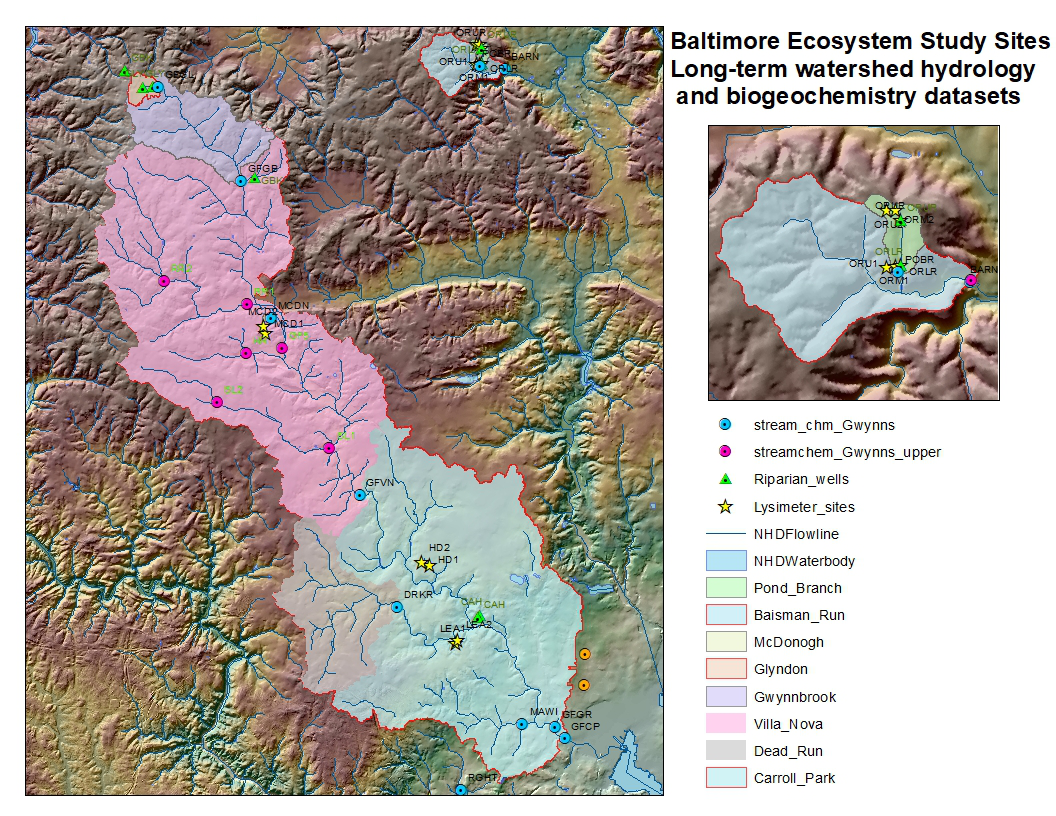

In [65]:
from PIL import Image

BESmap=Image.open('C:/Users/scho/OneDrive - DOI/Documents/USGS Mendenhall/Research activity/Data/LTER/BES/BES_obs_Site.jpg')
display(BESmap)

## 5. Plot data

### 5a. Baisman Run
In November of 1998 four rural, forested plots were established at Oregon Ridge Park in Baltimore County northeast of the Gwynns Falls Watershed. Oregon Ridge Park contains Pond Branch, the forested *reference watershed* for BES.

Lysimeter sites: 
- Oregon top slop--ORU1,2
- Oregon mid slope--ORM1,2
- Oregong upper riparian--ORUR
- Oregon lower riparian--ORLR

Riparian wells:
- ORUR
- ORLR

Stream chemistry:
- Pond Branch Forested referenc site--POBR
- Baisman Run at Ivy Hill Rd--BARN

#### Upper Pond Branch
Compare lysimeter data to downstream riparian data

In [140]:
#prepare data 
##lysimeter data

##filter data by site ID and plots
lysimeter_data_P_upperPond=lysimeter_data_P[lysimeter_data_P['Site'].isin(['ORU','ORM'])]
lysimeter_data_P_upperPond=lysimeter_data_P_upperPond[lysimeter_data_P_upperPond['Plot']==2]

lysimeter_data_N_upperPond=lysimeter_data_N[lysimeter_data_N['Site'].isin(['ORU','ORM'])]
lysimeter_data_N_upperPond=lysimeter_data_N_upperPond[lysimeter_data_N_upperPond['Plot']==2]

lysimeter_data_Amm_upperPond=lysimeter_data_Amm[lysimeter_data_Amm['Site'].isin(['ORU','ORM'])]
lysimeter_data_Amm_upperPond=lysimeter_data_Amm_upperPond[lysimeter_data_Amm_upperPond['Plot']==2]

##Riparian data by site ID

##filter by site ID
riparian_data_P_upperPond=riparian_data_P[riparian_data_P['Location'].isin(['ORUR'])]
riparian_data_N_upperPond=riparian_data_N[riparian_data_N['Location'].isin(['ORUR'])]
riparian_data_Amm_upperPond=riparian_data_Amm[riparian_data_Amm['Location'].isin(['ORUR'])]
riparian_data_h_upperPond=riparian_data_h[riparian_data_h['Location'].isin(['ORUR'])]

Text(0.5, 0, 'Time')

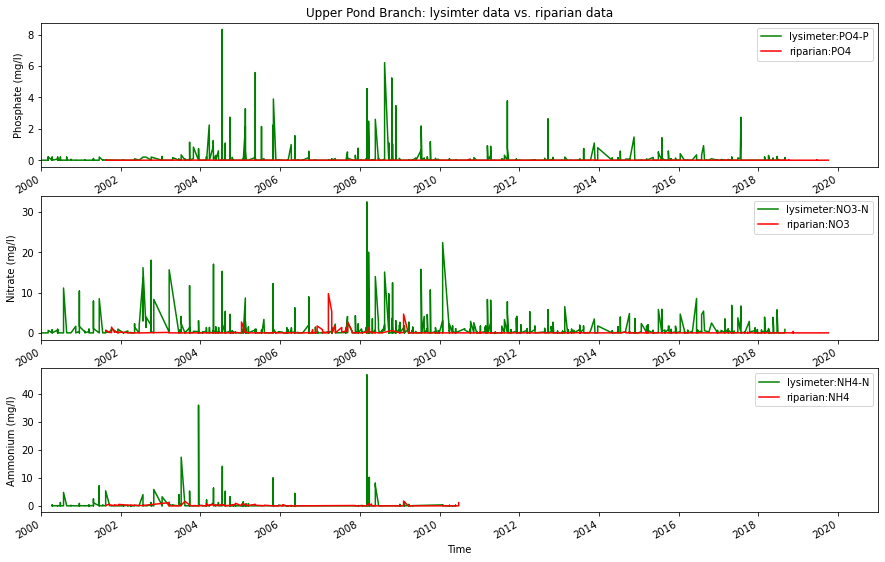

In [279]:
##plot time series 

fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(15,10))

lysimeter_data_P_upperPond.plot(x='Sampling_Date',y='PO4-P',style='g',ax=ax[0],label="lysimeter:PO4-P")
lysimeter_data_N_upperPond.plot(x='Sampling_Date',y='NO3-N',style='g',ax=ax[1],label="lysimeter:NO3-N")
lysimeter_data_Amm_upperPond.plot(x='Sampling_Date',y='NH4-N',style='g',ax=ax[2],label="lysimeter:NH4-N")

riparian_data_P_upperPond.plot(x='Sample_Date',y='PO4',style='r',ax=ax[0],label="riparian:PO4")
riparian_data_N_upperPond.plot(x='Sample_Date',y='NO3',style='r',ax=ax[1],label="riparian:NO3")
riparian_data_Amm_upperPond.plot(x='Sample_Date',y='NH4',style='r',ax=ax[2],label="riparian:NH4")

#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
#ax[2].set_yscale('log')

ax[0].set_xlim(['1/1/2000','12/31/2020'])
ax[1].set_xlim(['1/1/2000','12/31/2020'])
ax[2].set_xlim(['1/1/2000','12/31/2020'])

ax[0].title.set_text('Upper Pond Branch: lysimter data vs. riparian data')
ax[0].set(ylabel='Phosphate (mg/l)')
ax[1].set(ylabel='Nitrate (mg/l)')
ax[2].set(ylabel='Ammonium (mg/l)')

plt.xlabel('Time')

Time series of the upper Pond Branch compares the fluctuating concentrations of some tracer elements.
Now, compare the lysimeter and riparian data against stream chemistry site at the outlet

#### All of Pond Branch

In [260]:
#prepare data: filter data by site ID at the mouth of Pond Branch: gage ID: POBR

##lysimeter data
lysimeter_data_P_Pond=lysimeter_data_P[lysimeter_data_P['Site'].isin(['ORU','ORM'])]
lysimeter_data_N_Pond=lysimeter_data_N[lysimeter_data_N['Site'].isin(['ORU','ORM'])]
lysimeter_data_Amm_Pond=lysimeter_data_Amm[lysimeter_data_Amm['Site'].isin(['ORU','ORM'])]

##Riparian data by site ID
riparian_data_P_Pond=riparian_data_P[riparian_data_P['Location'].isin(['ORUR','ORLR'])]
riparian_data_N_Pond=riparian_data_N[riparian_data_N['Location'].isin(['ORUR','ORLR'])]
riparian_data_Amm_Pond=riparian_data_Amm[riparian_data_Amm['Location'].isin(['ORUR','ORLR'])]
riparian_data_h_Pond=riparian_data_h[riparian_data_h['Location'].isin(['ORUR','ORLR'])]

##Stream chem data
stream_data_P_Pond=stream_data_P[stream_data_P['Site'].isin(['POBR'])]
stream_data_TP_Pond=stream_data_TP[stream_data_TP['Site'].isin(['POBR'])]
stream_data_N_Pond=stream_data_N[stream_data_N['Site'].isin(['POBR'])]
stream_data_TN_Pond=stream_data_TN[stream_data_TN['Site'].isin(['POBR'])]
stream_data_Cl_Pond=stream_data_Cl[stream_data_Cl['Site'].isin(['POBR'])]
stream_data_S_Pond=stream_data_S[stream_data_S['Site'].isin(['POBR'])]
stream_data_K_Pond=stream_data_K[stream_data_K['Site'].isin(['POBR'])]
stream_data_Ca_Pond=stream_data_Ca[stream_data_Ca['Site'].isin(['POBR'])]
stream_data_Na_Pond=stream_data_Na[stream_data_Na['Site'].isin(['POBR'])]
stream_data_Mg_Pond=stream_data_Mg[stream_data_Mg['Site'].isin(['POBR'])]
stream_data_d_Pond=stream_data_d[stream_data_d['Site'].isin(['POBR'])]
stream_data_turb_Pond=stream_data_turb[stream_data_turb['Site'].isin(['POBR'])]

Text(0.5, 0, 'Time')

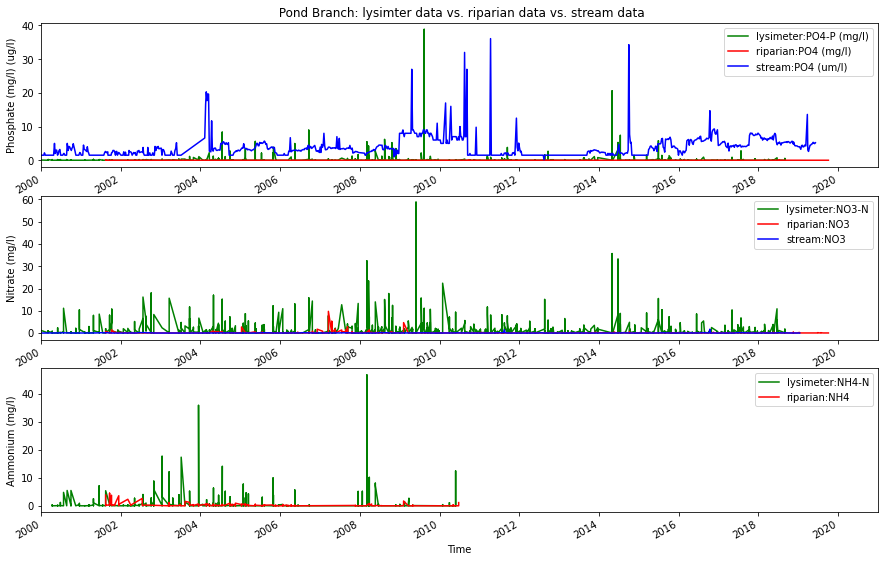

In [280]:
#plot time series of some key traceable elements: phosphate, nitrate, ammonium on field, riparian, and in stream

fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(15,10))

lysimeter_data_P_Pond.plot(x='Sampling_Date',y='PO4-P',style='g',ax=ax[0],label="lysimeter:PO4-P (mg/l)")
lysimeter_data_N_Pond.plot(x='Sampling_Date',y='NO3-N',style='g',ax=ax[1],label="lysimeter:NO3-N")
lysimeter_data_Amm_Pond.plot(x='Sampling_Date',y='NH4-N',style='g',ax=ax[2],label="lysimeter:NH4-N")

riparian_data_P_Pond.plot(x='Sample_Date',y='PO4',style='r',ax=ax[0],label="riparian:PO4 (mg/l)")
riparian_data_N_Pond.plot(x='Sample_Date',y='NO3',style='r',ax=ax[1],label="riparian:NO3")
riparian_data_Amm_Pond.plot(x='Sample_Date',y='NH4',style='r',ax=ax[2],label="riparian:NH4")

stream_data_P_Pond.plot(x='Date',y='PO4',style='b',ax=ax[0],label="stream:PO4 (um/l)")
#stream_data_TP_Pond.plot(x='Date',y='TP',style='c.',ax=ax[0].twinx(),label="stream:TP (um/l)")
stream_data_N_Pond.plot(x='Date',y='NO3',style='b',ax=ax[1],label="stream:NO3")
#stream_data_TN_Pond.plot(x='Date',y='TN',style='c--',ax=ax[1],label="stream:NO3")

ax[0].set_xlim(['1/1/2000','12/31/2020'])
ax[1].set_xlim(['1/1/2000','12/31/2020'])
ax[2].set_xlim(['1/1/2000','12/31/2020'])

ax[0].title.set_text(' Pond Branch: lysimter data vs. riparian data vs. stream data')
ax[0].set(ylabel='Phosphate (mg/l) (ug/l)')
#ax[0].twinx().set(ylabel='TP (ug/l)')
ax[1].set(ylabel='Nitrate (mg/l)')
ax[2].set(ylabel='Ammonium (mg/l)')

plt.xlabel('Time')

[Text(0, 0.5, 'concentration (mg/l)')]

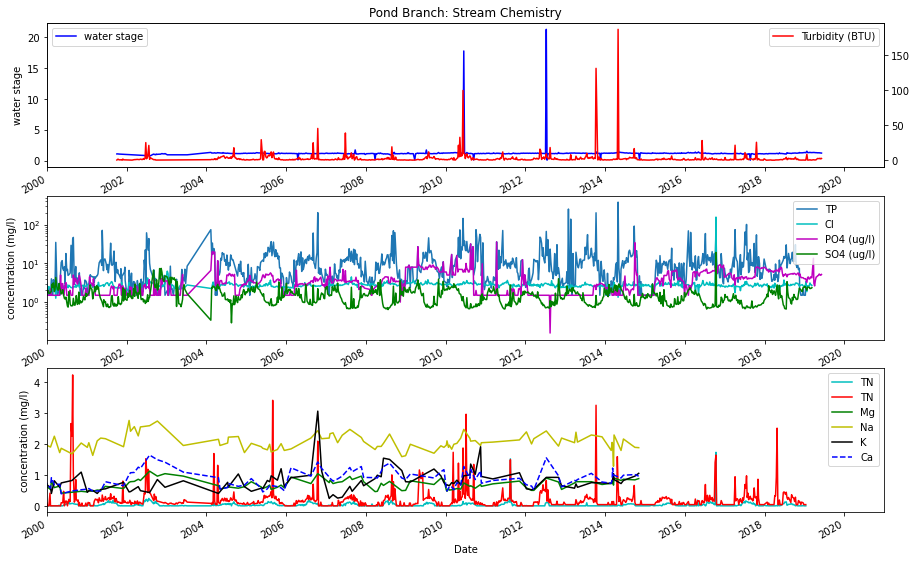

In [358]:
#plot time series from stream data: water stage, turbidity, TP, TN, sulfate, calcicum, potassium, magnisum
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(15,10))

stream_data_d_Pond.plot(x='Date',y='stage',style='b',ax=ax[0],label="water stage")
stream_data_turb_Pond.plot(x='Date',y='Turbidity',style='r',ax=ax[0].twinx(),label="Turbidity (BTU)")
ax[0].legend(loc=2)

stream_data_TP_Pond.plot(x='Date',y="TP",ax=ax[1],label="TP")
stream_data_Cl_Pond.plot(x='Date',y="Cl",style='c',ax=ax[1],label="Cl")
stream_data_P_Pond.plot(x='Date',y="PO4",style='m',ax=ax[1],label="PO4 (ug/l)")
stream_data_S_Pond.plot(x='Date',y="SO4",style='g',ax=ax[1],label="SO4 (ug/l)")

stream_data_N_Pond.plot(x='Date',y="NO3",style='c',ax=ax[2],label="TN")
stream_data_TN_Pond.plot(x='Date',y="TN",style='r',ax=ax[2],label="TN")
stream_data_Mg_Pond.plot(x='Date',y="Mg",style='g',ax=ax[2],label="Mg")
stream_data_Na_Pond.plot(x='Date',y="Na",style='y',ax=ax[2],label="Na")
stream_data_K_Pond.plot(x='Date',y="K",style='k',ax=ax[2],label="K")
stream_data_Ca_Pond.plot(x='Date',y="Ca",style='b--',ax=ax[2],label="Ca")

ax[1].set_yscale('log')

ax[0].title.set_text('Pond Branch: Stream Chemistry')

ax[0].set_xlim(['1/1/2000','12/31/2020'])
ax[1].set_xlim(['1/1/2000','12/31/2020'])
ax[2].set_xlim(['1/1/2000','12/31/2020'])

ax[0].set(ylabel='water stage')
ax[1].set(ylabel='concentration (mg/l)')
ax[2].set(ylabel='concentration (mg/l)')
#ax[0].twinx().set(ylabel='Turbidity (BTU)')


(1, 1.5)

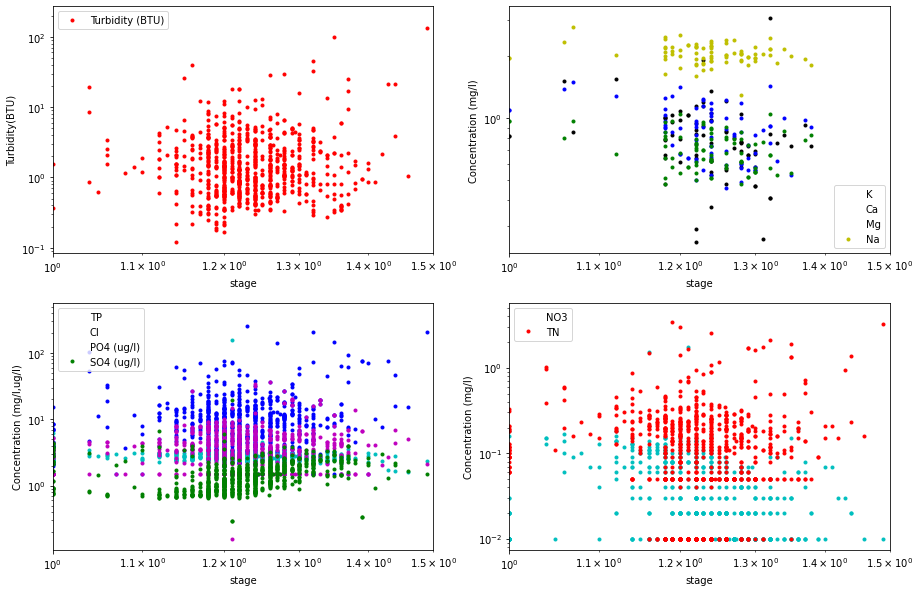

In [356]:
#Plot Concentration-discharge (C-Q) 
##using the river stage for now (USGS01583570_Pondbarnch daily Q downloaded and will be used)

fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(15,10))

stream_data_turb_Pond.plot(x='stage',y='Turbidity',style='r.',ax=ax[0,0],label="Turbidity (BTU)")

stream_data_K_Pond.plot(x='stage',y="K",style='k.',ax=ax[0,1],label="K")
stream_data_Ca_Pond.plot(x='stage',y="Ca",style='b.',ax=ax[0,1],label="Ca")
stream_data_Mg_Pond.plot(x='stage',y="Mg",style='g.',ax=ax[0,1],label="Mg")
stream_data_Na_Pond.plot(x='stage',y="Na",style='y.',ax=ax[0,1],label="Na")

stream_data_TP_Pond.plot(x='stage',y="TP",style='b.',ax=ax[1,0],label="TP")
stream_data_Cl_Pond.plot(x='stage',y="Cl",style='c.',ax=ax[1,0],label="Cl")
stream_data_P_Pond.plot(x='stage',y="PO4",style='m.',ax=ax[1,0],label="PO4 (ug/l)")
stream_data_S_Pond.plot(x='stage',y="SO4",style='g.',ax=ax[1,0],label="SO4 (ug/l)")

stream_data_N_Pond.plot(x='stage',y="NO3",style='c.',ax=ax[1,1],label="NO3")
stream_data_TN_Pond.plot(x='stage',y="TN",style='r.',ax=ax[1,1],label="TN")

ax[0,0].set(ylabel='Turbidity(BTU)')
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_xlim([1,1.5])

ax[0,1].set(ylabel='Concentration (mg/l)')
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim([1,1.5])

ax[1,0].set(ylabel='Concentration (mg/l,ug/l)')
ax[1,0].set_yscale('log')
ax[1,0].set_xscale('log')
ax[1,0].set_xlim([1,1.5])

ax[1,1].set(ylabel='Concentration (mg/l)')
ax[1,1].set_yscale('log')
ax[1,1].set_xscale('log')
ax[1,1].set_xlim([1,1.5])